## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model

## Data

In [2]:
# Load entire dataset into a data frame
# Note: Replace the phrase 'your downloaded dataset location' with the real location of the dataset
rawdata = pd.read_csv('C:\Code\KI\Moodle\RealEstate (1).csv')
# Convert column ART to type categorical; a categorical variable is a nominal or ordinal variable, or a non-metric variable
rawdata["ART"] = pd.Categorical(rawdata.ART, ['Flat', 'Attached', 'House'])
# Reorder the columns within the data frame
rawdata = rawdata.iloc[:, np.r_[6, 0:6, 7:8]]
# Print only a few rows of the entire data frame
rawdata.head()

<>:3: SyntaxWarning: invalid escape sequence '\C'
<>:3: SyntaxWarning: invalid escape sequence '\C'
C:\Users\lukib\AppData\Local\Temp\ipykernel_22340\3302433044.py:3: SyntaxWarning: invalid escape sequence '\C'
  rawdata = pd.read_csv('C:\Code\KI\Moodle\RealEstate (1).csv')


,PRICE,ART,SQM,DISTCENT,LUXURY,UNIVERS,POOL,SOLD
0,613508.57,House,157.23,5.53,1,0,1,1
1,734955.41,House,180.76,4.04,1,0,0,0
2,647991.15,House,166.10,5.91,0,0,0,0
3,476448.67,Attached,118.24,1.83,0,0,0,0
4,640034.09,Attached,163.92,6.18,1,1,1,1


## Pre-processing

Pre-processing of data consists of the following tasks:

* Dealing with missing values
* Dealing with outliers
* Dummification: Convert categorical columns into numeric representations in form of binary encoded dummy variables
* Split entire data set into train and test sets
* Scale train and test sets with certain technique

### Dummification

Number of dummy variables is equal to the unique values of the categorical variable minus 1

In [3]:
# Create dummy variables
rawdata = pd.get_dummies(rawdata, columns=["ART"], drop_first=True)
rawdata.head()

,PRICE,SQM,DISTCENT,LUXURY,UNIVERS,POOL,SOLD,ART_Attached,ART_House
0,613508.57,157.23,5.53,1,0,1,1,False,True
1,734955.41,180.76,4.04,1,0,0,0,False,True
2,647991.15,166.10,5.91,0,0,0,0,False,True
3,476448.67,118.24,1.83,0,0,0,0,True,False
4,640034.09,163.92,6.18,1,1,1,1,True,False


### Split entire dataset into train and test sets

In [4]:
# Convert data frame into numpy array and then split array into train and test arrays
train, test = train_test_split(rawdata.to_numpy(), shuffle=True)

### Scale data sets

In [5]:
# Extract X and y
train_X, train_y = train[:, 1:], train[:, 0].reshape(-1, 1)
test_X, test_y = test[:, 1:], test[:, 0].reshape(-1, 1)

# Fit a scaler on the training set and distinguish between X and y fits for later inverse transformations
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
train_scaled_X = scaler_X.fit_transform(train_X)
train_scaled_y = scaler_y.fit_transform(train_y)
# Apply the same scalers with learned parameters from training set on test set
test_scaled_X = scaler_X.transform(test_X)
test_scaled_y = scaler_y.transform(test_y)

## Neural Network Model

### Definition of the model architecture

In [6]:
# Input layer
# Therefor the number of input units (aka features) is needed
input = Input(shape=(train_scaled_X.shape[1],))
# Hidden layers
hidden = Dense(units=128, activation='relu')(input) # Note: The last parentheses include the input for the callable mechanism (an instance of a class can be directly used like a function)
hidden = Dense(units=64, activation='relu')(hidden)
hidden = Dense(units=32, activation='relu')(hidden)
hidden = Dense(units=16, activation='relu')(hidden)
# Output layer
output = Dense(units=train_scaled_y.shape[1], activation='linear')(hidden)

# Compose entire model
model = Model(inputs=input, outputs=output, name='Regression')

# Summarize layers
print(model.summary())

Model: "Regression"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,033 (47.00 KB)

 Trainable params: 12,033 (47.00 KB)

 Non-trainable params: 0 (0.00 B)

None


### Configuration of the training process and training of the model

In [7]:
# Configuration of the training process
model.compile(loss='mse', optimizer='adam', metrics=[tf.keras.metrics.RootMeanSquaredError()])

# Fit model
model.fit(x=train_scaled_X, y=train_scaled_y, epochs=50, batch_size=1)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - loss: 0.0142 - root_mean_squared_error: 0.1118
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 0.0011 - root_mean_squared_error: 0.0327
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 522us/step - loss: 8.6899e-04 - root_mean_squared_error: 0.0294
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 8.7630e-04 - root_mean_squared_error: 0.0295
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 6.7643e-04 - root_mean_squared_error: 0.0259
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 8.1319e-04 - root_mean_squared_error: 0.0284
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 7.7134e-04 - root_mean_squared_error: 0.0277
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 6.7128e-04 - root_mean_squared_error: 0.0255
Epoch 9/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 3.7454e-04 - root_mean_squared_error: 0.0192
Epoch 10/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 5

## Predictions
### Computations

In [8]:
# We define an own function for calculation of the root mean squared error
def rmse(actuals, preds):
    """Root mean squared error (RMSE)

    Arguments
    ---------
        actuals : vector-like, e.g. list, tupel, array
            A numeric vector with actual values.
        preds : vector-like, e.g. list, tupel, array
            A numeric vector with predicted values.

    Returns
    -------
       Root mean squared error : numpy.float
    """
    actuals, preds = np.array(actuals), np.array(preds)
    error = actuals - preds
    mse = np.mean(error**2)
    return np.sqrt(mse)

# In-sample and out-of-sample predictions
train_yhat = model.predict(train_scaled_X)
test_yhat = model.predict(test_scaled_X)
# Inverse transforming because of scaled values
train_rescaled_yhat = scaler_y.inverse_transform(train_yhat)
test_rescaled_yhat = scaler_y.inverse_transform(test_yhat)
# Compute RMSE
rmse_train = round(rmse(train_y, train_rescaled_yhat), 2)
rmse_test = round(rmse(test_y, test_rescaled_yhat), 2)
print("RMSE: Train = {0}, test = {1}".format(rmse_train, rmse_test))

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step
RMSE: Train = 23601.92, test = 26148.86


### Visualizations

C:\Users\lukib\AppData\Local\Temp\ipykernel_22340\2088272756.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


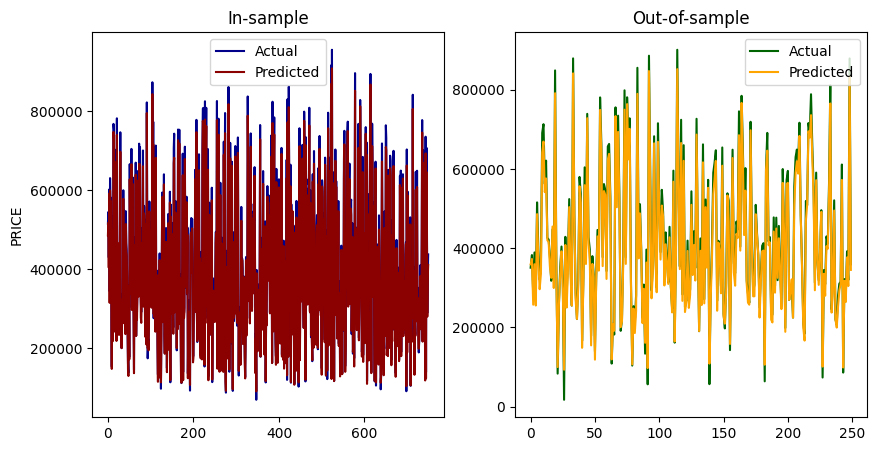

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
# In-sample plot
axes[0].plot(train_y, label='Actual', linestyle='solid', color='darkblue')
axes[0].plot(train_rescaled_yhat, label='Predicted', linestyle='solid', color='darkred')
axes[0].set_title("In-sample")
axes[0].set_ylabel('PRICE')
axes[0].legend()
# Out-of-sample plot
axes[1].plot(test_y, label='Actual', linestyle='solid', color='darkgreen')
axes[1].plot(test_rescaled_yhat, label='Predicted', linestyle='solid', color='orange')
axes[1].set_title("Out-of-sample")
axes[1].legend()
fig.show()